# 문제 개요

이 문제는 실제 Programmers 채용 공고 페이지를 방문한 개발자들의 방문/지원 기록을 바탕으로 추천모델을 만들어보는 것이다. 참고로 모든 데이터는 익명화되었음을 밝힌다. 구체적으로 개발자(userID로 표현됨)와 채용공고(jobID로 표현됨)를 보고 개발자가 해당 채용공고에 지원할지 안 할지를 예측하는 Binary Classifier를 만드는 것이다. 이 모델을 만드는데 필요한 feature들은 부가적으로 제공되는 데이터 파일들을 바탕으로 만들어내면 되며 이에 대해서는 뒤의 데이터 세트 섹션에서 설명한다.

# 데이터 세트 설명

이 문제를 해결하는데 필요한 데이터들은 다음과 같은 6개의 파일에 들어있으며 각 파일에 관해 설명한다.

## train.csv
이 파일의 처음 5줄은 다음과 같다:

>userID,jobID,applied
>
>fe292163d06253b716e9a0099b4,0
>
>6377fa90618fae77571e8dc90d9,0
>
>8ec0888a5b04139be0dfe942c7e,1
>
>f862b39f767d3a1991bdeb2ea14,0

첫 번째 칼럼은 개발자의 ID이고 두 번째 칼럼은 구인공고(이후 “잡”이라 표현)의 ID가 된다. 마지막 세 번째 칼럼은 개발자가 해당 구인공고를 보고 지원을 했는지 여부를 나타낸다. 앞서 이야기했듯이 이번에 만들어볼 추천모델은 개발자와 잡의 페어를 보고 지원 여부를 예측하는 것이다. 이를 위해서는 개발자와 잡에 대한 세부 정보가 필요한데 뒤에 나오는 4개의 파일에서 그런 정보들(Features)을 추출할 수 있다.

## job_tags.csv
이 파일의 처음 5줄은 다음과 같다:

> jobID,tagID
>
>320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
>
>e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
>
>e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
>
>e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d

이 파일은 각 잡의 키워드(tagID)들을 나타낸다. 하나의 잡에는 여러 개의 키워드가 존재할 수 있다. tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다.

## user_tags.csv
이 파일의 처음 5줄은 다음과 같다:

>userID,tagID
>
>e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
>
>e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
>
>e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
>
>e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53

이 파일은 각 개발자가 관심사로 등록한 키워드(tagID)들을 나타낸다. 한 개발자가 여러 개의 키워드를 등록할 수 있다. 앞서 job_tags.csv처럼 tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다. 예를 들어 tagID가 1189인 키워드는 JUnit이다.

## tags.csv
이 파일의 처음 5줄은 다음과 같다:

>tagID,keyword
>
>602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
>
>e3251075554389fe91d17a794861d47b,Tensorflow
>
>a1d50185e7426cbb0acad1e6ca74b9aa,Docker
>
>884d79963bd8bc0ae9b13a1aa71add73,Git

앞에서 이 파일은 이미 두 번 설명한 셈인데 tagID에 해당하는 실제 키워드가 무엇인지 기술한다.

## job_companies.csv
이 파일의 처음 5줄은 다음과 같다:

>companyID,jobID,companySize
>
>00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,
>
>1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
>
>89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
>
>acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10

이 파일은 잡과 관련된 회사가 어디인지 그 정보를 보여주는데 별다른 정보는 없고 회사의 규모를 보여주는 필드가 존재하는데 이 필드는 옵션 필드이다 (값이 존재하지 않을 수 있음). 이 정보를 통해 어떤 잡들이 어느 회사에서 나온 것이고 그 회사의 크기는 어떻게 되는지 알 수 있다.

## test.csv
이 파일이 바로 최종 예측 모델의 입력이 되는 파일로 처음 다섯 줄은 다음과 같다:

>userID,jobID
>
>ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
>
>9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
>
>33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
>
>ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f

라인마다 userID와 jobID가 있고 이 개발자가 이 잡에 지원을 할지 말지 예측을 하면 된다.

# 최종 제출 파일

- 최종 제출 파일은 applied 필드를 가지는 csv파일이며 test.csv에서 나오는 user가 지원했을지 여부를 값으로 가져야 한다. (1이면 지원을 나타내고 0이면 지원하지 않음을 나타냄)

- 최종 제출 파일의 n번째 줄값은 test.csv의 n번째 줄 사용자에 대한 예측값이어야 한다.


# 데이터 관련 안내

- 작성한 코드의 저작권은 응시자에게 있음

- 데이터의 저작권은 그렙에 있으므로 제3자에게 공유하거나 개인적인 용도로 사용할 수 없으며, 외부 블로그 등에 공개 불가

- 그렙에서 사용하기 위해 데이터를 제공하는 것이 아니며, 실전 데이터를 제공해서 평가 진행하기 위해 제공함

- 모델 학습을 위해 외부 데이터 및 모델(pre-trained model)을 사용 불가


# 채점 방식
- Accuracy 100%

# 이 과제에 대한 나의 접근 방법

- 우선 각 항목별로 주어진 데이터가 많고, 모델을 훈련시키기 전에 충분한 EDA가 필요해보인다.
- 단순한 이진 분류 모델이지만, XGBoost 등 여러가지 모델을 사용해보는 것이 가능한 것으로 보인다.
- 모델을 빌드하는데 있어서 많은 부분들을 영화 추천 모델 프로젝트를 참고하면서 진행했다.

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 1. 훈련 데이터 압축 풀어주기
local_zip = './train_job.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

In [3]:
# 2. train.csv 파일 pandas로 읽어들이기

train_all = pd.read_csv("./train.csv")

train_all.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [4]:
# 3. job_tags 파일 pandas로 읽어들이기

job_tags = pd.read_csv('./job_tags.csv')

job_tags.head()

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [5]:
# 4. user_tags 파일 pandas로 읽어들이기

user_tags = pd.read_csv('./user_tags.csv')

user_tags.head()

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [6]:
# 5. tags 파일 pandas로 읽어들이기
# Distinct하게 tagID가 있는 것은 887개
tags = pd.read_csv('./tags.csv')

tags.head()

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python


In [7]:
# 6. job_companies 파일 pandas로 읽어들이기

job_companies = pd.read_csv('./job_companies.csv')

job_companies.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [8]:
# 7. test 파일 pandas로 읽어들이기

test = pd.read_csv("./test_job.csv")

test.head()

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4


# 1. EDA 진행하기

## 1 - 1) train.csv 파일의 EDA

- 유저들이 확인한 구인 공고 중에 가장 많은 지원이 이뤄진 회사는 어디인가?
- userID는 Distinct한 정보만 모여져 있는가? 아니면 한 유저가 여러 회사를 열람한 정보가 모여져 있는가?
- 암호화된 태그와 유저 정보, 그리고 기업 정보를 그대로 사용하면 안된다 --> 수치화 필요.
- 어떤 특정 스택을 많이 써야 지원이 된다는 식의 연결은 지양되어야함 --> 기업에서 요구하는 스택이 갖춰지면, 지원

In [9]:
# 유저 별 태그의 수가 가장 많은 것들을 추려보기

user_tag_cnt = user_tags["tagID"].value_counts()
user_tag_cnt

f47330643ae134ca204bf6b2481fec47    820
0e095e054ee94774d6a496099eb1cf6a    796
c8ba76c279269b1c6bc8a07e38e78fa4    701
2ba8698b79439589fdd2b0f7218d8b07    564
3948ead63a9f2944218de038d8934305    516
                                   ... 
515ab26c135e92ed8bf3a594d67e4ade      1
07042ac7d03d3b9911a00da43ce0079a      1
fae0b27c451c728867a567e8c1bb4e53      1
9ad6aaed513b73148b7d49f70afcfb32      1
d82118376df344b0010f53909b961db3      1
Name: tagID, Length: 345, dtype: int64

In [10]:
# 유저별 가장 많이 태그를 해놓는 기술 스택은 자바스크립트와 자바임

tags[(tags["tagID"] == "f47330643ae134ca204bf6b2481fec47") | (tags["tagID"] == "0e095e054ee94774d6a496099eb1cf6a")]

,tagID,keyword
10,0e095e054ee94774d6a496099eb1cf6a,JavaScript
15,f47330643ae134ca204bf6b2481fec47,Java


In [11]:
# 유저가 태그한 기술의 갯수와 기업이 태그한 기술의 갯수 차이가 있음 --> 유저가 태그한 것 중 불필요한 태그들이 있다는 뜻.
job_tag_cnt = job_tags["tagID"].value_counts()
job_tag_cnt

0e095e054ee94774d6a496099eb1cf6a    219
f47330643ae134ca204bf6b2481fec47    197
4122cb13c7a474c1976c9706ae36521d    187
3948ead63a9f2944218de038d8934305    153
c8ba76c279269b1c6bc8a07e38e78fa4    143
                                   ... 
fec87a37cdeec1c6ecf8181c0aa2d3bf      1
e92d74ccacdc984afa0c517ad0d557a6      1
4079016d940210b4ae9ae7d41c4a2065      1
f18a6d1cde4b205199de8729a6637b42      1
bb03e43ffe34eeb242a2ee4a4f125e56      1
Name: tagID, Length: 240, dtype: int64

In [12]:
# 대략적으로 기업과 지원자 모두 사용하고자하는 기술 태그 상위가 일치하는 것을 확인할 수 있음.
tags[(tags["tagID"] == "f47330643ae134ca204bf6b2481fec47") | (tags["tagID"] == "0e095e054ee94774d6a496099eb1cf6a")]

,tagID,keyword
10,0e095e054ee94774d6a496099eb1cf6a,JavaScript
15,f47330643ae134ca204bf6b2481fec47,Java


Text(0, 0.5, '#users')

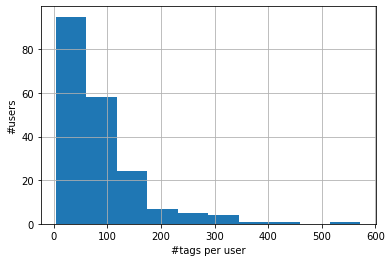

In [13]:
# 유저들은 대체로 1 ~ 100개 사이에서 본인의 기술 태그를 언급하고 있음
user_tags.groupby("userID").size().sort_values(ascending=False).hist()

plt.xlabel("#tags per user")
plt.ylabel("#users")

Text(0, 0.5, '#jobs')

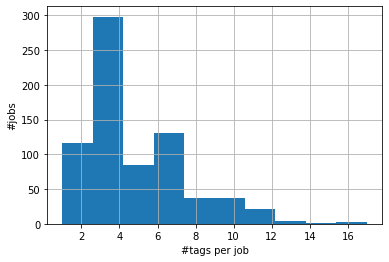

In [14]:
# 대체로 기업들은 2 ~ 4개 사이에서 해당 포지션에 필요한 기술 태그를 언급하고 있음.
job_tags.groupby("jobID").size().sort_values(ascending=False).hist()

plt.xlabel("#tags per job")
plt.ylabel("#jobs")

In [15]:
# user 계정에서 설정되어 있는 각 태그들의 갯수 세기
train_all['user_tags'] = 0
train_all['company_size'] = 0
for i in range(len(train_all)):
    train_all['user_tags'].iloc[i] =len(user_tags[user_tags['userID'] == train_all['userID'].iloc[i]])

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
def calculate_tags_ratio(userID, jobID):
    user_tag_list = []
    job_tag_list = []
    val = []
    user_tag_list = user_tags[user_tags['userID'] == userID ]['tagID'].tolist()
    job_tag_list = job_tags[job_tags['jobID'] == jobID ]['tagID'].tolist()
    
    
    for i in job_tag_list:
        if i in user_tag_list:
            val.append(1)
            
    return len(val)/len(job_tag_list)

In [17]:
train_all['coincide_tags'] = 0
train_all

for i in range(len(train_all)):
    train_all['coincide_tags'].iloc[i] = calculate_tags_ratio(train_all['userID'].iloc[i], train_all['jobID'].iloc[i])


In [18]:
def set_df(df,user_tags,job_tags):
    
    df['user_tags'] = 0
    df['job_tags_counts'] = 0
    df['coincide_tags'] = 0
    for i in range(len(df)):
        df['user_tags'].iloc[i] =len( user_tags[user_tags['userID'] == df['userID'].iloc[i]])
        df['job_tags_counts'].iloc[i] =len( job_tags[job_tags['jobID'] == df['jobID'].iloc[i]])
        df['coincide_tags'].iloc[i] = calculate_tags_ratio(df['userID'].iloc[i], df['jobID'].iloc[i])
        
    return df

a = set_df(test,user_tags,job_tags)
a

,userID,jobID,user_tags,job_tags_counts,coincide_tags
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,143,7,0.428571
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,48,7,0.142857
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,78,7,0.142857
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,15,4,0.000000
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,100,6,0.000000
...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,82,4,0.000000
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,30,3,0.666667
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,170,4,0.500000
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,30,3,0.333333


In [19]:
X = train_all[['user_tags','coincide_tags']]
y = train_all[['applied']]

test_df_X = test[['user_tags','coincide_tags']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [21]:
model=xgb.XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, # default
                    max_depth=10,
                    min_child_weight=3, 
                    n_estimators=150, 
                    nthread=4, 
                    objective='binary:logistic', 
                    )

model.fit(X_train,y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=100, verbose=5)

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.12
Will train until validation_0-error hasn't improved in 100 rounds.
[5]	validation_0-error:0.120833
[10]	validation_0-error:0.121667
[15]	validation_0-error:0.121667
[20]	validation_0-error:0.121667
[25]	validation_0-error:0.120833
[30]	validation_0-error:0.120833
[35]	validation_0-error:0.120833
[40]	validation_0-error:0.12
[45]	validation_0-error:0.120833
[50]	validation_0-error:0.120833
[55]	validation_0-error:0.120833
[60]	validation_0-error:0.120833
[65]	validation_0-error:0.120833
[70]	validation_0-error:0.120833
[75]	validation_0-error:0.120833
[80]	validation_0-error:0.120833
[85]	validation_0-error:0.120833
[90]	validation_0-error:0.120833
[95]	validation_0-error:0.120833
[100]	validation_0-error:0.120833
Stopping. Best iteration:
[0]	validation_0-error:0.12



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
model.score(X_test,y_test)

0.88

In [23]:
test_df_y = model.predict(test_df_X)

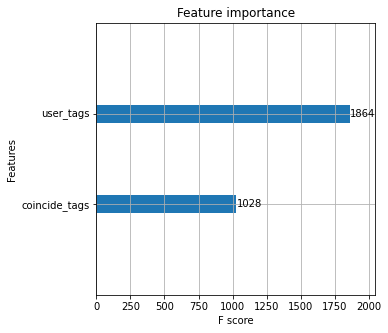

In [24]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(5, 5))
plot_importance(model, ax=ax)

In [25]:
result = pd.DataFrame(test_df_y)

In [26]:
test_df = pd.read_csv("./sample_output_job.csv")
# test_df
test_df = result
test_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [27]:
test_df.to_csv('recommendation.csv', index=False)